# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "csv_output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
name = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    response = requests.get(query_url + city).json()

    try:
        name.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {len(name)} of Set 1 |{city}")
    
          
    except:
        print(f"City not found. Skipping...")
        pass

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 |mataura
Processing Record 2 of Set 1 |butaritari
Processing Record 3 of Set 1 |rikitea
Processing Record 4 of Set 1 |port hawkesbury
Processing Record 5 of Set 1 |ushuaia
Processing Record 6 of Set 1 |torbay
City not found. Skipping...
Processing Record 7 of Set 1 |kapaa
Processing Record 8 of Set 1 |vardo
Processing Record 9 of Set 1 |arua
Processing Record 10 of Set 1 |khatanga
Processing Record 11 of Set 1 |saldanha
Processing Record 12 of Set 1 |hofn
Processing Record 13 of Set 1 |barrow
Processing Record 14 of Set 1 |husavik
Processing Record 15 of Set 1 |qaqortoq
Processing Record 16 of Set 1 |constitucion
City not found. Skipping...
Processing Record 17 of Set 1 |qaanaaq
Processing Record 18 of Set 1 |airai
Processing Record 19 of Set 1 |addis abeba
Processing Record 20 of Set 1 |kaseda
Processing Record 21 of Set 1 |ngunguru
Processing Record 22 of Set 1 |punta arenas
Processing Record 23 of Set 1 |

Processing Record 186 of Set 1 |mount isa
Processing Record 187 of Set 1 |vila franca do campo
Processing Record 188 of Set 1 |arraial do cabo
City not found. Skipping...
Processing Record 189 of Set 1 |honiara
Processing Record 190 of Set 1 |geraldton
Processing Record 191 of Set 1 |dikson
Processing Record 192 of Set 1 |auki
Processing Record 193 of Set 1 |marsa matruh
Processing Record 194 of Set 1 |takoradi
Processing Record 195 of Set 1 |eureka
Processing Record 196 of Set 1 |yatou
Processing Record 197 of Set 1 |lompoc
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 198 of Set 1 |marsh harbour
Processing Record 199 of Set 1 |moose factory
Processing Record 200 of Set 1 |san patricio
Processing Record 201 of Set 1 |arman
Processing Record 202 of Set 1 |redmond
Processing Record 203 of Set 1 |san cristobal
Processing Record 204 of Set 1 |srandakan
Processing Record 205 of Set 1 |san juan
Processing Record 206 of Set 1 |mamlyutka

City not found. Skipping...
Processing Record 372 of Set 1 |concepcion
Processing Record 373 of Set 1 |guerrero negro
Processing Record 374 of Set 1 |birao
Processing Record 375 of Set 1 |coyah
Processing Record 376 of Set 1 |bandarban
Processing Record 377 of Set 1 |eruwa
Processing Record 378 of Set 1 |leshukonskoye
Processing Record 379 of Set 1 |gigmoto
Processing Record 380 of Set 1 |tual
Processing Record 381 of Set 1 |biak
Processing Record 382 of Set 1 |ostrovnoy
Processing Record 383 of Set 1 |fuerte olimpo
Processing Record 384 of Set 1 |zima
Processing Record 385 of Set 1 |cap malheureux
Processing Record 386 of Set 1 |shache
City not found. Skipping...
City not found. Skipping...
Processing Record 387 of Set 1 |nouadhibou
Processing Record 388 of Set 1 |bolekhiv
Processing Record 389 of Set 1 |victor harbor
Processing Record 390 of Set 1 |lenger
Processing Record 391 of Set 1 |dir
Processing Record 392 of Set 1 |bartica
Processing Record 393 of Set 1 |praia da vitoria
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Check the count, to make sure that there have been no missing values
print(f" City {len(name)}")
print(f" Cloudiness {len(cloud)}")
print(f" Country {len(country)}")
print(f" Date {len(date)}")
print(f" Humidity {len(humidity)}")
print(f" Lat {len(lat)}")
print(f" Lng {len(lng)}")
print(f" Max Temp {len(max_temp)}")
print(f" Wind Speed {len(wind_speed)}")

 City 555
 Cloudiness 555
 Country 555
 Date 555
 Humidity 555
 Lat 555
 Lng 555
 Max Temp 555
 Wind Speed 555


In [7]:
#Create a Dataframe
city_weather = pd.DataFrame({
        "City" : name,
        "Cloudiness" : cloud,
        "Country" : country, 
        "Date" : date, 
        "Humidity" : humidity,
        "Lat" : lat,
        "Lng" : lng,
        "Max Temp" : max_temp,
        "Wind Speed" : wind_speed 
})

city_weather.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,0,NZ,1586555520,95,-46.19,168.86,50.00,3.00
1,Butaritari,100,KI,1586555408,74,3.07,172.79,84.42,9.37
2,Rikitea,77,PF,1586555478,74,-23.12,-134.97,77.00,5.95
3,Port Hawkesbury,90,CA,1586555521,69,45.62,-61.35,41.00,18.34
4,Ushuaia,75,AR,1586555519,70,-54.80,-68.30,46.40,26.40
5,Torbay,90,CA,1586555521,100,47.67,-52.73,41.00,25.28
6,Kapaa,1,US,1586555372,61,22.08,-159.32,78.80,12.75
7,Vardø,100,NO,1586555522,90,70.37,31.11,28.89,16.69
8,Arua,90,UG,1586555522,46,3.02,30.91,71.22,4.41
9,Khatanga,100,RU,1586555474,97,71.97,102.50,29.35,23.29


In [8]:
city_weather.to_csv(output_data_file, index = False, header= True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

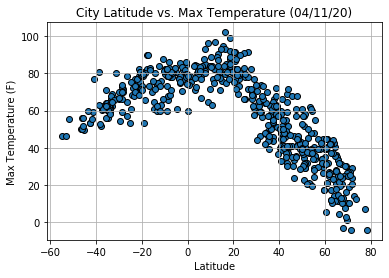

In [9]:
plt.scatter(city_weather.iloc[:, 5], city_weather.iloc[:, 7], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/11/20)")
plt.grid()
plt.savefig("images/lat_temperature.png")
plt.show()

My code is analyzing the relationship between the latitude and the maximum temperature in Fahrenheit. The plot above shows that the close the city lies to the equator (Latitude = 0), the higher is the maximum temperature. The temperature drops more heavily in the Northern Hemishpere at this tome of the year. 


#### Latitude vs. Humidity Plot

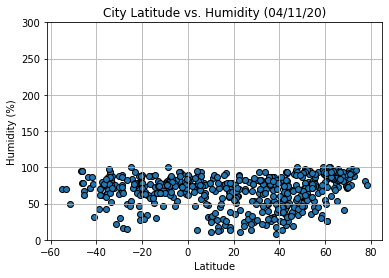

In [10]:
plt.scatter(city_weather.iloc[:, 5], city_weather.iloc[:, 4], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 300)
plt.title("City Latitude vs. Humidity (04/11/20)")
plt.grid()
plt.savefig("images/lat_humidity.png")
plt.show()

My code is analyzing the relationship between Latitude and Humidity in percentage. We can see that there is no correlation between the latitude and the humidity in the cities i looked at. However, most cities (Northern and Southern Hemishpere alike) have a humidity over 50 percent. 

#### Latitude vs. Cloudiness Plot

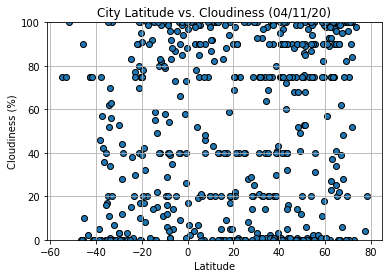

In [11]:
plt.scatter(city_weather.iloc[:, 5], city_weather.iloc[:, 1], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness (04/11/20)")
plt.grid()
plt.savefig("images/lat_cloud.png")
plt.show()

My code is analyzing the relationship betweeen the Latitude and the Cloudiness in percentage. It can be seen that there is absolutely no correlation between Latitude and the percentage of clouds. 

#### Latitude vs. Wind Speed Plot

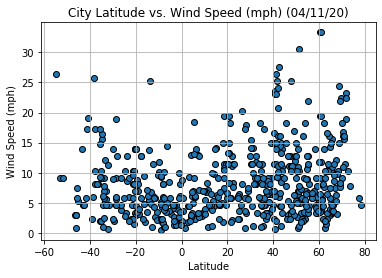

In [12]:
plt.scatter(city_weather.iloc[:, 5], city_weather.iloc[:, 8], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (04/11/20)")
plt.grid()
plt.savefig("images/lat_wind_speed.png")
plt.show()

My code is analyzing the relationship between Latitude and Wind Speed in mph. Most cities have a Wind Speed between 0 and 15 mph, regardless of their proximity to the Equator (Latitude = 0). There might be a slght increase in Wind Speed for countries between Latitude 40 and 60. 

## Linear Regression

In [13]:
# Create a function to create Linear Regression plots
def weather_linear_regression (x_values, y_values, ylabel, coordinates): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    print(f"The r-squared is: {rvalue}")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.show()

In [14]:
# Northern Hemishpere DateFrame have a Latitude > 0 (0 is the Equator and neither Northern nor Southern)
north_df = city_weather.loc[city_weather["Lat"] > 0]
north_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Butaritari,100,KI,1586555408,74,3.07,172.79,84.42,9.37
3,Port Hawkesbury,90,CA,1586555521,69,45.62,-61.35,41.00,18.34
5,Torbay,90,CA,1586555521,100,47.67,-52.73,41.00,25.28
6,Kapaa,1,US,1586555372,61,22.08,-159.32,78.80,12.75
7,Vardø,100,NO,1586555522,90,70.37,31.11,28.89,16.69


In [15]:
# Southern Hemishpere DateFrame have a Latitude < 0 (0 is the Equator and neither Northern nor Southern)
south_df = city_weather.loc[city_weather["Lat"] < 0]
south_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,0,NZ,1586555520,95,-46.19,168.86,50.00,3.00
2,Rikitea,77,PF,1586555478,74,-23.12,-134.97,77.00,5.95
4,Ushuaia,75,AR,1586555519,70,-54.80,-68.30,46.40,26.40
10,Saldanha,0,ZA,1586555522,88,-33.01,17.94,62.60,6.93
15,Constitución,17,CL,1586555523,65,-35.33,-72.42,60.57,10.27


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8994717830027009


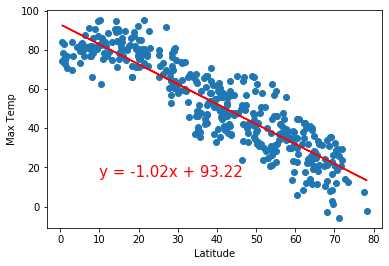

<Figure size 432x288 with 0 Axes>

In [78]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]

weather_linear_regression(x_values, y_values, "Max Temp", (10, 15))

plt.savefig("images/north_lat_max_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7203350141797663


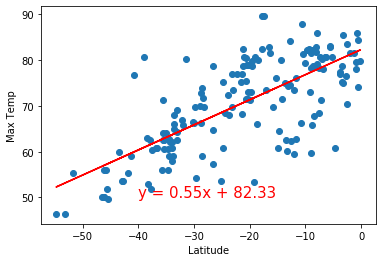

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]

weather_linear_regression(x_values, y_values, "Max Temp", (-40, 50))

plt.savefig("images/south_lat_max_temp.png")


The Linear Regression is modelling the relationship between Latitude and the Maximum Temperature in Fahrenheit in the Northern and Southern Hemisphere. In the Northern Hemishpere we have a negative relationship, meaning that the higher a city away from the Equator, the lower the Maximum Temperature at the moment. An opposite relationship can be seen for the Southern Hemishpere. This makes sense, since the Maximum Temperature is also decreasing, the further away a city from the Equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31691991871205055


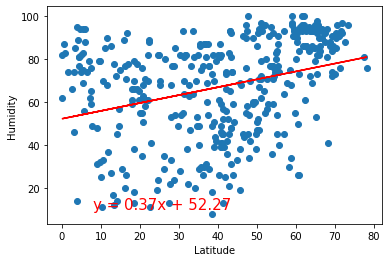

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]

weather_linear_regression(x_values, y_values, "Humidity", (8, 10))

plt.savefig("images/north_lat_humidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.057954850610485026


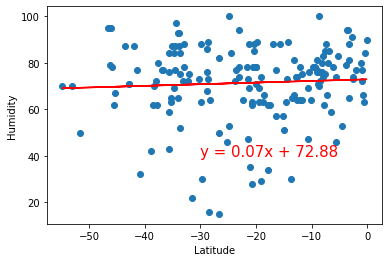

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]

weather_linear_regression(x_values, y_values, "Humidity", (-30, 40))

plt.savefig("images/south_lat_max_temp.png")


The Linear Regression is modelling the relationship between Latitute and Humidity in the Northern and Southern Hemisphere. In both Hemishperes, the correlation is positive, but not very high (almost inexistent in the Southern Hemisphere). We can say that in the Northern Hemisphere the further away the city from the Equator, the more likely the city has a higher humdity. However, those numbers might change, choosing a different sample of cities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13527553159295755


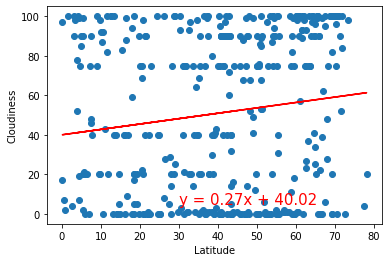

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]

weather_linear_regression(x_values, y_values, "Cloudiness", (30, 5))

plt.savefig("images/north_lat_cloudiness.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28997867916422243


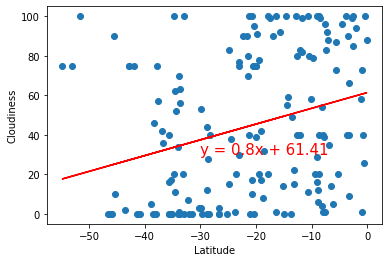

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]

weather_linear_regression(x_values, y_values, "Cloudiness", (-30, 30))


plt.savefig("images/south_lat_max_temp.png")


The Linear Regression is modelling the relationship between Latitude and the Cloudiness (in percentage) in the Northern and Southern Hemisphere. Both regressions show positiv correlations, whilst the one for the Southern Hemisphere is greater than for the Northern. We can see that the closer a city in the Southern Hemisphere lies to the Equator, the more likely it is to be cloudy there. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17601717678062187


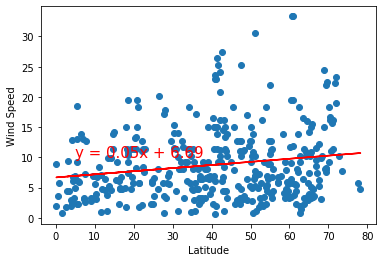

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]


weather_linear_regression(x_values, y_values, "Wind Speed", (5, 10))

plt.savefig("images/north_lat_wind_speed.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2885403911933489


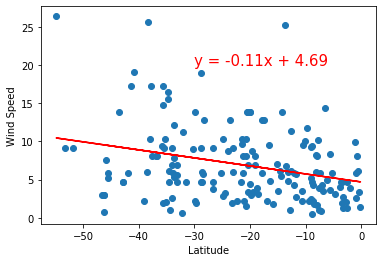

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]

weather_linear_regression(x_values, y_values, "Wind Speed", (-30, 20))

plt.savefig("images/south_lat_wind_speed.png")


The Linear Regression is modelling the relationship between Latitude and Wind Speed in the Northern and Southern Hemisphere. For the Northern Hemisphere there is a slight positive correlation and for the Southern Hemishpere a slight, but stronger negative correlation. We can say that in for the Southern Hemishpere, the closer a city to the Equator, the more likely the Wind Speed might less than further down in the South. 

## Three Observable Trends based on the Data

1. As expected, cities (on both the Northern and Southern Hemisphere) that are located closer to the Equator have a 
   higher Maximum Temperature. 


2. Cities in the Northern Hemisphere show a greater humidity the further away they are located from the Equator, 
   whilst this trend is much weaker for cities in the Southern Hemisphere.
   
   
3. It is hard to provide a trend about the Cloudiness in relation to the Latitude. However, when we plot the data 
   seperately for the Northern and Southern Hemishpere can can say that the closer a city in the Southern Hemishpere 
   is located to the Equator, the more likely the city is more cloudy. This might be counter intuitive, since one 
   might think that cities closer to the Equator are warmer and thus must have less clouds.  